# Differential evolution

In [1]:
GLOBAL_D = 30

## Results on the `Sphere` function

Algorithm converged after 852 generations
	Mean fitness: 6.6e-05
	Best fitness: 3e-05
	Best chromosome: [-0.000434, -0.000701, -0.000643, -0.000428, 0.00025, 0.000987, 2.3e-05, 0.001928, -0.001189, -0.000887, -0.000213, 0.000726, 3e-05, -0.000864, 0.001973, 0.000145, -0.001082, 0.001664, 0.001082, -0.00118, 0.000266, -0.000997, -0.001202, 0.00082, 0.000857, 4.5e-05, -0.000724, -0.002092, 0.000495, 0.001075]


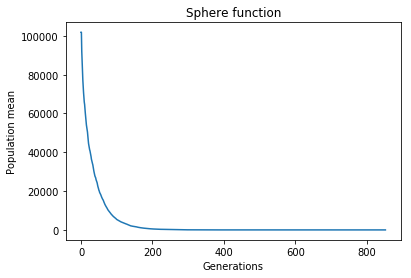

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Sphere


sphere_sim = DE(Sphere, GLOBAL_D, (-100, 100))
sphere_sim.run()
best = sorted(sphere_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(sphere_sim.generations))
print('\tMean fitness:', round(sphere_sim.results[-1][0], 6))
print('\tBest fitness:', round(best.fitness, 6))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(sphere_sim.generations + 1))
SY = [x[0] for x in sphere_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Sphere function')
plt.show()

## Results on the `Ackley` function

Algorithm converged after 885 generations
	Mean fitness: 7.19e-05
	Best fitness: 4.78e-05
	Best chromosome: [-1.3e-05, -2e-06, -2.6e-05, 2e-06, -1.9e-05, 8e-06, 1.1e-05, -1.2e-05, 6e-06, -4e-06, 6e-06, -6e-06, -1.3e-05, -2.3e-05, -9e-06, -1.4e-05, -5e-06, -1e-05, 3e-06, -2.5e-05, -9e-06, 3e-06, 2e-06, 5e-06, 2.4e-05, -4e-06, -0.0, 9e-06, -9e-06, -3e-06]


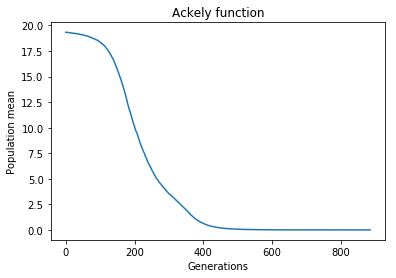

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Ackley


ackley_sim = DE(Ackley, GLOBAL_D, (-30, 30), crossover_probability=0.1)
ackley_sim.run()
best = sorted(ackley_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(ackley_sim.generations))
print('\tMean fitness:', round(ackley_sim.results[-1][0], 7))
print('\tBest fitness:', round(best.fitness, 7))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(ackley_sim.generations + 1))
SY = [x[0] for x in ackley_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Ackely function')
plt.show()

## Results on the `Griewangk` function

Algorithm converged after 938 generations
	Mean fitness: 4.64e-05
	Best fitness: 2.72e-05
	Best chromosome: [-0.000212, 0.000705, -0.001463, -0.000675, 0.00362, -0.0054, -0.001012, 0.001095, 0.007463, -0.000273, -0.001889, 0.002898, -0.003346, 0.01226, -0.00474, 0.00626, -0.002966, -0.0009, 0.003321, -0.00448, 0.006366, -0.011376, 0.001076, 0.003019, -0.002717, -0.00135, -0.005547, 0.015863, -0.002735, -0.006027]


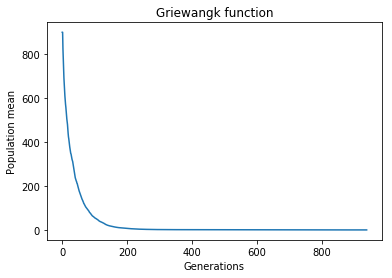

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Griewangk


griewangk_sim = DE(Griewangk, GLOBAL_D, (-600, 600))
griewangk_sim.run()
best = sorted(griewangk_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(griewangk_sim.generations))
print('\tMean fitness:', round(griewangk_sim.results[-1][0], 7))
print('\tBest fitness:', round(best.fitness, 7))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(griewangk_sim.generations + 1))
SY = [x[0] for x in griewangk_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Griewangk function')
plt.show()

# GIF generaion

The code below can be called to generate a set of images to be later used to construct a `.GIF` file.

**Note:** It only work with the dimension set to $d=1$ and after the simulations above have ben ran.

Building images for Sphere...
Building images for Ackley...
Building images for Griewangk...


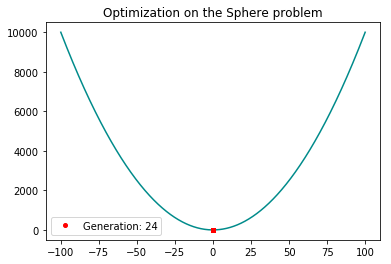

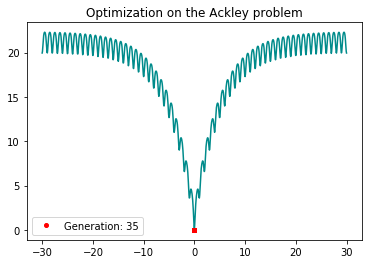

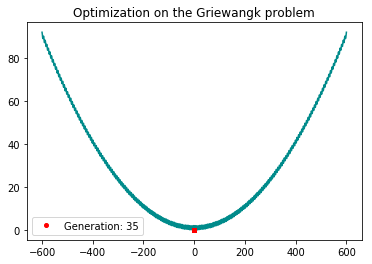

In [6]:
import numpy as np


def plot_curves(frames, PClass, p_name, output_dir, sim):
    print('Building images for {}...'.format(p_name))
    if sim.generations < frames:
        steps = list(range(sim.generations))
    else:
        steps = list(range(0, sim.generation, int(sim.generation / frames)))
        if sim.generations % mul != 0:
            steps.append(sim.generation - 1)
    fig, ax = plt.subplots()
    X = np.linspace(sim.S[0], sim.S[1], num=1000)
    Y = [PClass([x]).fitness for x in X]
    c = 0
    for i in steps:
        ax.clear()
        ax.set_title('Optimization on the {} problem'.format(p_name))
        result = sim.results[i]
        generation = result[1]
        dataX = [x.chromosome[0] for x in generation]
        dataY = [x.fitness for x in generation]
        ax.plot(X, Y, color='darkcyan')
        ax.plot(dataX, dataY, 'ro', markersize=4, label='Generation: {}'.format(i+1))
        ax.legend()
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(10)))
        c += 1

plot_curves(100, Sphere, 'Sphere', 'output/sphere', sphere_sim)
plot_curves(100, Ackley, 'Ackley', 'output/ackley', ackley_sim)
plot_curves(100, Griewangk, 'Griewangk', 'output/griewangk', griewangk_sim)
